Preliminary Result: 

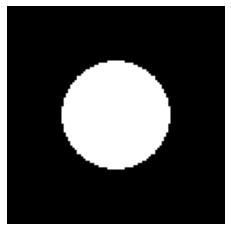

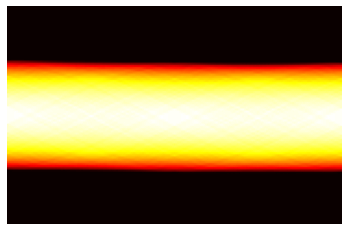

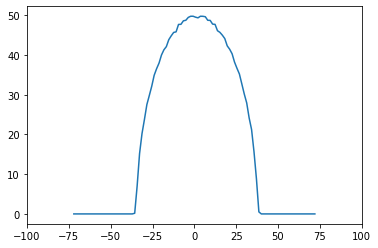

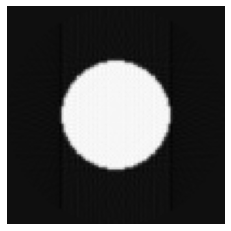

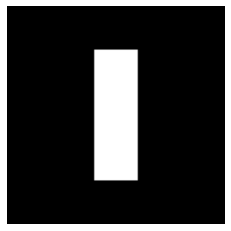

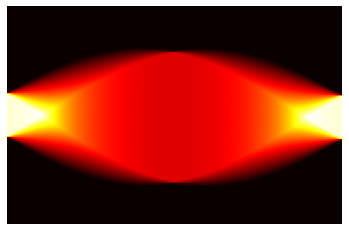

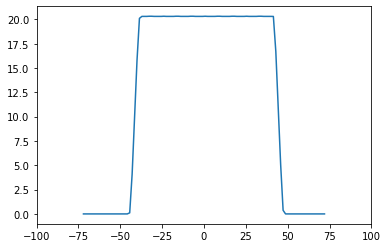

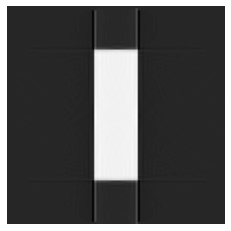

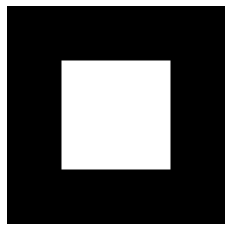

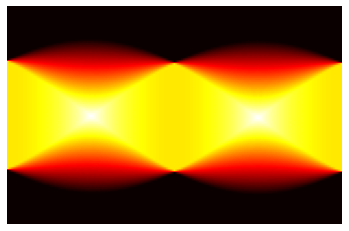

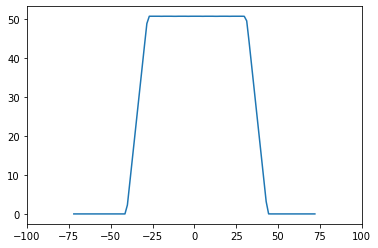

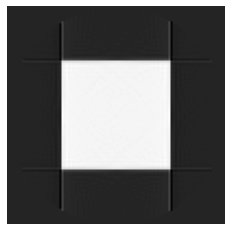

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import radon, iradon
from PIL import Image

x = y = np.linspace(-1,1,100)
X, Y  = np.meshgrid(x,y)

### Circle Image
R = np.sqrt(X**2 + Y**2)
C = np.zeros_like(X)
C = R < 0.5
plt.figure()
plt.axis('off')
plt.imshow(C, cmap='gray')

# Circle Sinogram
theta = np.arange(0, 181, 1)
Csinogram = radon(C, theta=theta, preserve_range=True)
plt.figure()
plt.axis('off')
plt.imshow(Csinogram, cmap='hot', extent=(0, 180.0, -72, 72), aspect='auto')

# Circle Cross-Section
xaxis = np.linspace(-72, 72, 100, endpoint=True)
th = 100
g_rho = Csinogram[:, th]
plt.figure()
plt.plot(xaxis, g_rho)
plt.xlim(-100,100)

# Circle Reconstruction
Crecon = iradon(Csinogram, theta=theta)
plt.figure()
plt.axis('off')
plt.imshow(Crecon, cmap='gray')


### Rectangle Image
R = np.zeros_like(X)
R[20:80,40:60] = 1.0
plt.figure()
plt.axis('off')
plt.imshow(R, cmap='gray')

# Rectangle Sinogram
Rsinogram = radon(R, theta=theta, preserve_range=True)
plt.figure()
plt.axis('off')
plt.imshow(Rsinogram, cmap='hot', extent=(0, 180.0, -72, 72), aspect='auto')

# Rectangle Cross-Section
g_rho = Rsinogram[:, th]
plt.figure()
plt.plot(xaxis, g_rho)
plt.xlim(-100,100)

# Rectangle Reconstruction
Rrecon = iradon(Rsinogram, theta=theta)
plt.figure()
plt.axis('off')
plt.imshow(Rrecon, cmap='gray')


### Square Image
S = np.zeros_like(X)
S[25:75, 25:75] = 1.0
plt.figure()
plt.axis('off')
plt.imshow(S, cmap='gray')

# Square Sinogram
Ssinogram = radon(S, theta=theta, preserve_range=True)
plt.figure()
plt.axis('off')
plt.imshow(Ssinogram, cmap='hot', extent=(0, 180.0, -72, 72), aspect='auto')

# Square Cross-Section
g_rho = Ssinogram[:, th]
plt.figure()
plt.plot(xaxis, g_rho)
plt.xlim(-100,100)

# Square Reconstruction
Srecon = iradon(Ssinogram, theta=theta)
plt.figure()
plt.axis('off')
plt.imshow(Srecon, cmap='gray')

Text(0.5, 1.0, 'Mickey Mouse Reconstruction')

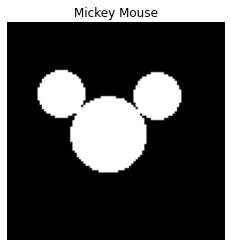

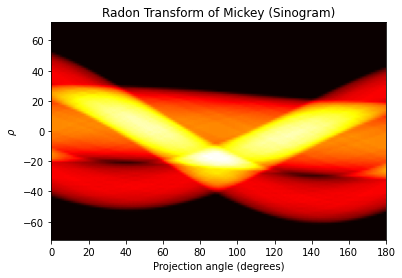

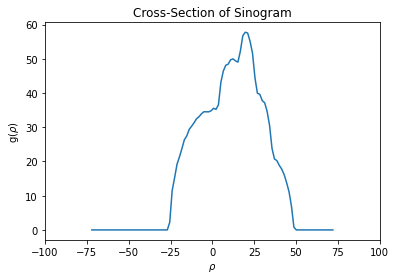

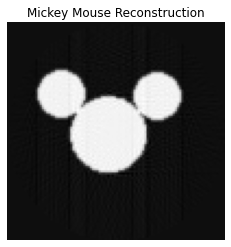

In [2]:
### Mickey Mouse Image
Mickey = Image.open('MickeyMouse.png')
# converting image to grayscale in 0-255 valuees
Mickey = Mickey.convert('L')       
Mickey = np.asarray(Mickey)        
Mickey = Mickey/255

plt.figure()
plt.axis('off')
plt.imshow(Mickey, cmap='gray')
plt.title('Mickey Mouse')

#Sinogram
Mickeysinogram = radon(Mickey, theta=theta, preserve_range=True)
plt.figure()
plt.xlabel('Projection angle (degrees)')
plt.ylabel(r'$\rho$')
plt.imshow(Mickeysinogram, cmap='hot', extent=(0, 180.0,-72, 72), aspect='auto')
plt.title('Radon Transform of Mickey (Sinogram)')

#Cross Section
g_rho = Mickeysinogram[:, th]
plt.figure()
plt.plot(xaxis, g_rho)
plt.ylabel(r'g($\rho$)')
plt.xlabel(r'$\rho$')
plt.title('Cross-Section of Sinogram')
plt.xlim(-100,100)

#Reconstruction
Mickeyrecon = iradon(Mickeysinogram, theta=theta)
plt.figure()
plt.axis('off')
plt.imshow(Mickeyrecon, cmap='gray')
plt.title('Mickey Mouse Reconstruction')



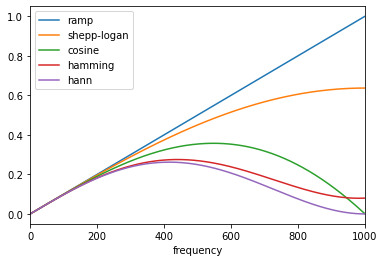

In [5]:
###Reconstruction with the Filtered Back Projection
from skimage.transform.radon_transform import _get_fourier_filter

filters = ['ramp', 'shepp-logan', 'cosine', 'hamming', 'hann']
plt.figure()
for ix, f in enumerate(filters):
    response = _get_fourier_filter(2000, f)
    plt.plot(response, label=f)

plt.xlim([0, 1000])
plt.xlabel('frequency')
plt.legend()

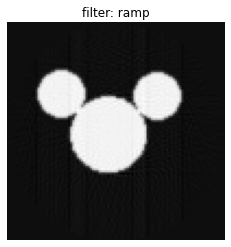

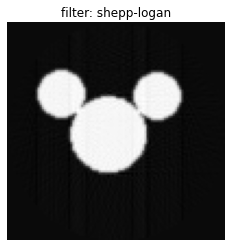

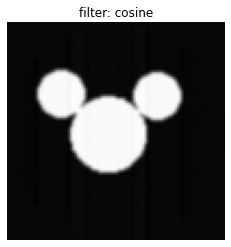

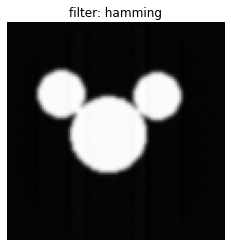

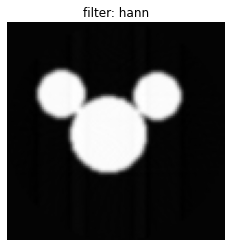

In [30]:
# MultiCircles Reconstruction with Filters

for fil in filters:
    Mrecon = iradon(Msinogram, theta=theta, filter_name=fil)
    plt.figure()
    plt.axis('off')
    plt.imshow(Mrecon, cmap='gray')
    plt.title(f'filter: {fil}')
    plt.show()



In [29]:
from skimage.metrics import structural_similarity as ssim
import cv2
import argparse

def options():
 parser = argparse.ArgumentParser(description="Read image metadata")
 parser.add_argument("-o", "--first", help="Input image file.", required=True)
 parser.add_argument("-c", "--second", help="Input image file.", required=True)
 args = parser.parse_args()
 return args

def mse(imageA, imageB):
 # the 'Mean Squared Error' between the two images is the sum of the squared difference between the two images
 mse_error = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
 mse_error /= float(imageA.shape[0] * imageA.shape[1])

 # return the MSE. The lower the error, the more "similar" the two images are.
 return mse_error

def compare(imageA, imageB):
 # Calculate the MSE and SSIM
 m = mse(imageA, imageB)
 s = ssim(imageA, imageB)

 # Return the SSIM. The higher the value, the more "similar" the two images are.
 return s


print(mse(M,Mrecon1))
print(compare(M,Mrecon1))

0.004886525721988129
0.9269132844700684


(0.924, 0.94)

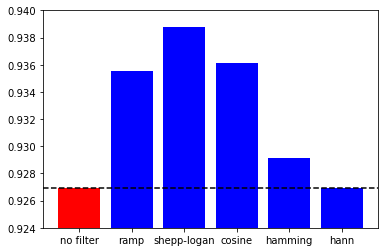

In [42]:
yval = [0.9269132844700684,0.9355682672325166,0.9387650970874919,0.9361301771429432,0.9291064291179729,0.9269132844700684]
xval = ['no filter','ramp', 'shepp-logan', 'cosine', 'hamming', 'hann']
colors = ['red', 'blue', 'blue', 'blue','blue','blue']

plt.bar(xval, yval, color = colors)
plt.axhline(0.9269132844700684, color = 'black', linestyle = 'dashed')
plt.ylim(0.924,0.94)